<a href="https://colab.research.google.com/github/h4rrye/car_accidents/blob/main/car_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>***VISUAL DATA EXPLORATION***</u>
<br>
<h3> <i>The primary objective of this project is to develop visually compelling and publication-quality plot templates that adhere to scientific standards of clarity, precision, and aesthetic appeal.</i> </h3>
<hr>
<br>

# **Key Factors Influencing Traffic Accidents**

## About Dataset
This dataset captures key factors influencing traffic accidents in both urban and rural areas. It provides detailed information about environmental, infrastructural, and behavioral variables that are crucial for understanding the dynamics of road safety. With a focus on **8,756 observations**, it covers a wide range of scenarios, from dense urban intersections to quieter rural roads.

## Key Features

- **Accidents:** The number of recorded traffic accidents, ranging from minor incidents to significant collisions.
- **Traffic Fine Amount:** Represents the average amount of traffic fines (in thousands of USD) in the observed area, linked to enforcement efforts and driver behavior.
- **Traffic Density:** A score indicating the volume of vehicles in the area, on a scale from **0 (low)** to **10 (high).**
- **Traffic Lights:** Proportion of traffic lights in the area, highlighting intersections with varying levels of control.
- **Pavement Quality:** A rating (**0-5**) of road conditions, with higher values indicating better infrastructure.
- **Urban or Rural Classification:** Binary indicator showing whether the area is urban (**1**) or rural (**0**).
- **Average Speed:** The typical speed of vehicles in kilometers per hour, representing driving conditions.
- **Rain Intensity:** A scale from **0 (no rain)** to **3 (heavy rain),** emphasizing the role of weather in accidents.
- **Vehicle Count:** Estimated number of vehicles (in thousands) present in the area during the observation.
- **Time of Day:** A 24-hour format (**0 to 24**) to capture temporal patterns in accident occurrences.



## LIBRARIES

In [2]:
# install required libraries
%pip install -q SciencePlots
%pip install -q matplotlib-label-lines
%pip install -q joypy

# import libraries
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy

import warnings
warnings.filterwarnings('ignore')

# import data visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from labellines import labelLines
import joypy
import scienceplots

%matplotlib inline


from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder




In [3]:
# import data
url_ta = 'https://raw.githubusercontent.com/SantiagoTorresM/Traffic_Accidents/refs/heads/main/traffic_accidents.csv'
url_tad = 'https://raw.githubusercontent.com/SantiagoTorresM/Traffic_Accidents/refs/heads/main/traffic_accidents_dict.csv'

ta = pd.read_csv(url_ta)
tad = pd.read_csv(url_tad)

In [4]:
ta.sample(10)

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
87,23,6.7380,8.7629,0.7766,0.8513,0,15.8396,1.8231,28.9359,1.4240
4636,18,3.9594,2.3114,0.7753,4.5578,1,0.9647,0.4142,34.5911,20.0245
4004,23,2.3432,1.5074,0.1987,0.5292,1,9.7815,1.9060,85.3218,11.9888
1930,19,6.2199,4.5592,0.1629,2.8874,0,31.8782,1.6253,86.6242,19.0465
2458,22,5.4001,8.3659,0.3219,3.5852,1,6.0895,1.0808,37.3355,20.0103
838,11,6.2253,2.6292,0.2676,2.5332,0,33.1049,0.0727,88.8267,9.5543
1181,23,4.0768,6.7713,0.5155,0.9837,1,5.1036,0.5289,90.2656,6.0426
7212,20,3.4049,3.8118,0.9320,3.2942,1,10.3080,1.2159,18.3058,4.8901
6950,17,7.7745,4.1861,0.3419,1.8122,0,1.8771,2.6112,55.5287,22.0594
1968,24,4.0106,6.9376,0.3394,4.8745,1,36.9876,1.7484,4.9866,18.8005


In [5]:
tad.sample(10)

,Variable,Description
3,traffic_lights,Proportion of traffic lights in the area (0 to...
0,accidents,"Number of recorded accidents, as a positive in..."
4,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."
2,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
7,rain_intensity,"Rain intensity, scale from 0 (no rain) to 3 (h..."
5,urban_area,"Urban area (1) or rural area (0), as an integer."
9,time_of_day,Time of day in 24-hour format (0 to 24).
1,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
6,average_speed,Average speed of vehicles in km/h.
8,vehicle_count,"Estimated number of vehicles, in thousands, as..."


## DATA PROCESSING

In [31]:

# rounding the time to hrs
ta['time_hrs'] = round(ta['time_of_day'], 0).astype(int)



# rounding hours to period : morning, afternoon, evening, night
time_to_period = dict(early_morning=[3, 4, 5],
                      morning=[6, 7, 8, 9,  10, 11],
                      afternoon=[12, 13, 14, 15],
                      evening=[16, 17, 18, 19, 20],
                      night=[21, 22, 23, 24, 0, 1, 2])


period_to_time = {hour: period for period, hours in time_to_period.items() for hour in hours}
ta['period'] = ta['time_hrs'].replace(period_to_time)

# creating numerical categories for periods
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ta['period_encoded'] = label_encoder.fit_transform(ta['period'])


# normalizing accidents with traffic density for further analysis
ta['accidents_per_density'] = ta['accidents'] / ta['traffic_density']


ta.sample(10)


,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,time_hrs,period,accidents_per_density,period_encoded
8097,29,2.7195,9.5478,0.7531,2.0862,0,24.1668,1.8875,84.7548,13.1173,13,afternoon,3.037349,0
2468,26,5.2799,4.1350,0.8900,3.3426,1,26.0480,2.6330,43.9753,21.6912,22,night,6.287787,4
862,21,5.7195,7.2231,0.2070,3.9315,1,25.8557,1.7150,28.7833,9.9472,10,morning,2.907339,3
3213,18,7.2455,7.5180,0.8724,1.0730,0,4.8870,0.2924,45.3506,17.6420,18,evening,2.394254,2
4285,20,6.3571,6.4112,0.9270,3.7874,1,18.0655,0.9638,63.9540,18.3097,18,evening,3.119541,2
151,25,3.1561,6.2872,0.9904,4.0057,1,31.7155,1.4097,61.7371,6.9580,7,morning,3.976333,3
5755,26,4.4455,7.5717,0.1964,3.9117,0,39.3628,2.8168,62.2641,13.5029,14,afternoon,3.433839,0
3055,14,9.7168,9.4086,0.3396,4.9528,1,32.9326,0.3677,90.3183,8.2763,8,morning,1.488000,3
3353,13,5.5635,1.8595,0.0896,4.1837,0,0.5121,1.6878,97.0728,7.9877,8,morning,6.991127,3
3491,17,6.4616,1.0451,0.0735,0.2572,0,33.5285,2.1775,41.4272,5.0011,5,early_morning,16.266386,1


## VISUALIZATION

In [7]:

# setting up color schemes and themes

import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

#bodacious colors
colors_1 = sns.color_palette("rocket",6)
colors_2 = sns.color_palette("crest",6)

#Ram's colors, if desired
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

# found this color palette in some other code


### **Accident frequency at different speeds**

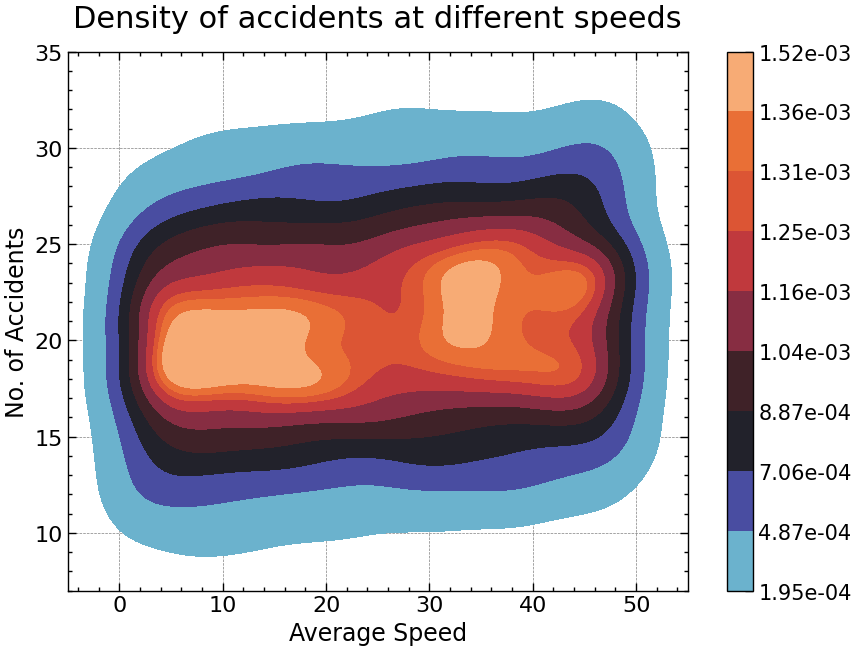

In [10]:
# Density Plot

plt.figure(figsize=(10, 7), dpi=100)
g = sns.kdeplot(x=ta['average_speed'], y=ta['accidents'], color='blue', cmap='icefire', fill=True, cbar=True)
g.set(xlim=(-5, 55), ylim=(7, 35))
g.set_xlabel('Average Speed', fontsize=17)
g.set_ylabel('No. of Accidents', fontsize=17)
plt.title('Density of accidents at different speeds', fontsize=22, y=1.03)


cbar = g.collections[-1].colorbar               # retrieve the last object drawn in the plot
labels = cbar.get_ticks()
labels_e = [f'{label:.2e}' for label in labels]

cbar.set_ticks(labels)
cbar.set_ticklabels(labels_e, fontsize=15)


plt.show()



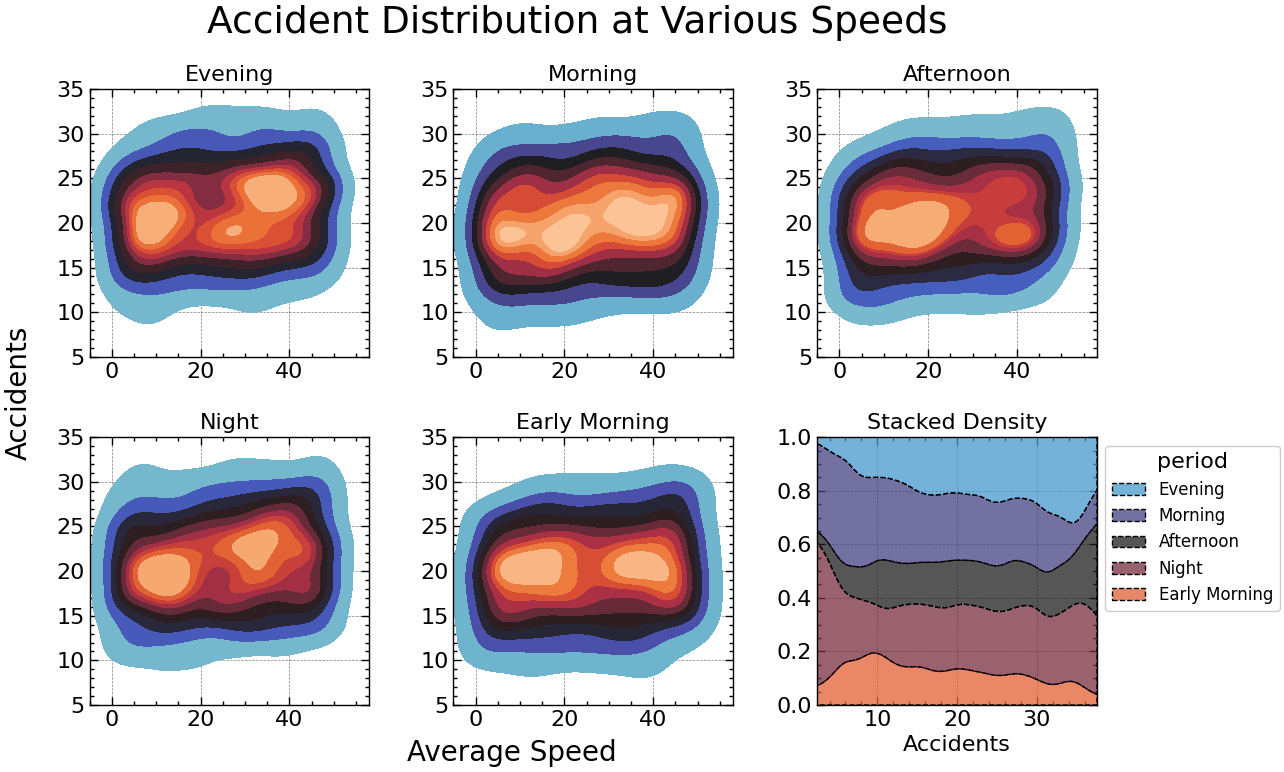

In [11]:
# split the above plot by periods

periods = ta['period'].unique()
period_labels = ['Evening', 'Morning', 'Afternoon', 'Night', 'Early Morning']


fig = plt.figure(figsize=(13, 8), dpi=100)
gs = gridspec.GridSpec(2, 3, figure=fig)
gs.update(wspace=0.3, hspace=0.3)


for i, period in enumerate(periods):
    ax = fig.add_subplot(gs[i])
    sns.kdeplot(x='average_speed', y='accidents', data=ta.loc[ta['period'] == period], fill=True, cmap='icefire', ax=ax, label=period_labels[i])
    ax.set_xlim(-5, 58)
    ax.set_ylim(5, 35)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(period_labels[i])


ax = fig.add_subplot(gs[5])
sns.kdeplot(x='accidents', data=ta, hue='period', multiple='fill', palette='icefire', linestyle='--')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, labels=period_labels)
ax.set_xlabel('Accidents')
ax.set_ylabel('')
ax.set_title('Stacked Density')


fig.text(0.45, 0.04, 'Average Speed', ha='center', fontsize=20)
fig.text(0.06, 0.5, 'Accidents', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.95, 'Accident Distribution at Various Speeds', ha='center', fontsize=27)


plt.show()


Although no distinct overall trend is observed, the number of accidents appears to exhibit a proportional relationship with average speed during the Evening and Night periods.

## Accident Density Distribution at different time of the day.

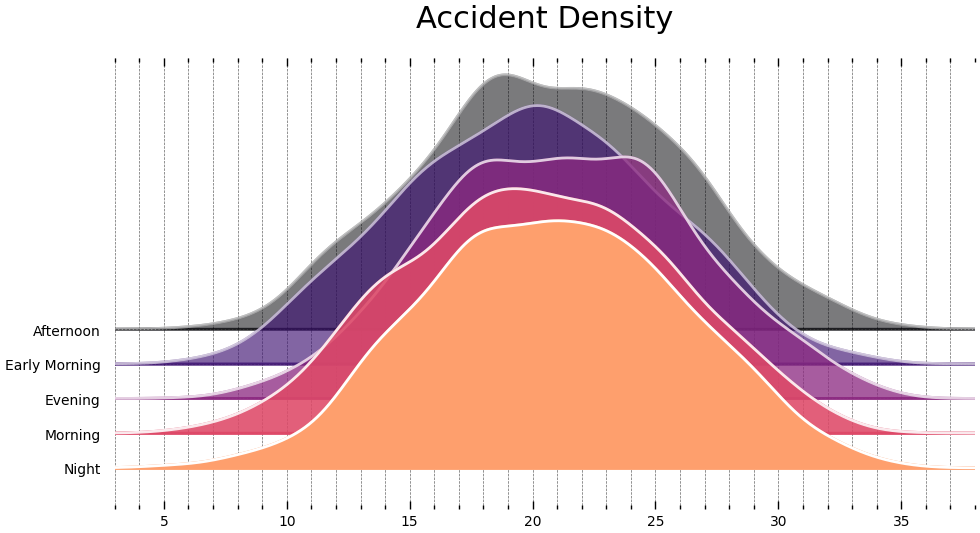

In [14]:

import joypy
from matplotlib import cm

fig, axes = joypy.joyplot(ta, by='period', column=['accidents'],
                        overlap=4, alpha=0.3, linecolor='white', linewidth=2,
                        colormap=cm.magma, fade=True, grid=False, figsize=(10,5),
                        labels=['Afternoon', 'Early Morning', 'Evening', 'Morning', 'Night'])

plt.title('Accident Density', fontsize=22, y=1.05)

for ax in axes:
    ax.set_xlim(3, 38)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()



A high frequency of accidents is observed during the Afternoon and Evening periods, whereas the lowest frequency occurs during the Early Morning and Afternoon periods. The Afternoon period exhibits the maximum spread of accident occurrences.

## Linear Relation between Speed and Accident Frequency.

Plotting the **Linear Regression** line to analyze the relationship between the number of accidents and various speed levels, stratified by time period. Additionally, the number of accidents was normalized by traffic frequency to account for the assumption that higher traffic volumes may contribute to an increased number of accidents.

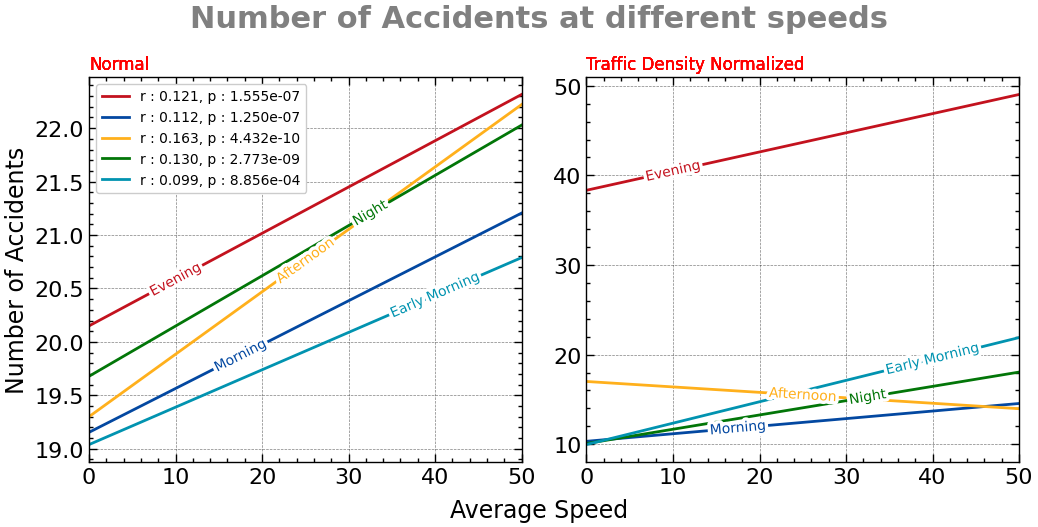

In [16]:

from scipy.stats import linregress
from labellines import labelLines

pr = []

periods = ['evening', 'morning', 'afternoon', 'night', 'early_morning']
period_labels = ['Evening', 'Morning', 'Afternoon', 'Night', 'Early Morning']

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fig.subplots_adjust(hspace=0.1, wspace=0.15)

ax = axes[0]
for i, period in enumerate(periods):
    x = ta.loc[ta['period'] == period, 'average_speed']
    y = ta.loc[ta['period'] == period, 'accidents']

    lr = linregress(x, y)
    pr.append(f'r : {lr.rvalue:.3f}, p : {lr.pvalue:.3e}')

    sns.regplot(x='average_speed', y='accidents', data=ta.loc[ta['period'] == period],
                line_kws=dict(linewidth=2), scatter=False, ci=None, color=seshadri[i], label=period_labels[i], ax=ax)

    ax.set_xlim(0, 50)
    ax.set_xlabel('')
    ax.set_ylabel('Number of Accidents', fontsize=17)
    ax.text(0, 1.02, 'Normal', transform=ax.transAxes, color='red', fontsize=12)

lines = ax.get_lines()
labelLines(lines, align=True)
ax.legend(labels=pr, loc='upper left', fontsize=10)

ax = axes[1]
for i, period in enumerate(periods):
    x = ta.loc[ta['period'] == period, 'average_speed']
    y = ta.loc[ta['period'] == period, 'accidents_per_density']

    lr = linregress(x, y)

    sns.regplot(x='average_speed', y='accidents_per_density', data=ta.loc[ta['period'] == period],
                line_kws=dict(linewidth=2), scatter=False, ci=None, color=seshadri[i], label=period_labels[i], ax=ax)

    ax.set_xlim(0, 50)
    ax.set_xlabel('')
    ax.set_ylabel('')
    #ax.yaxis.set_label_position('right')
    ax.text(0, 1.02, 'Traffic Density Normalized', transform=ax.transAxes, color='red', fontsize=12)

fig.text(0.5, 0.98, 'Number of Accidents at different speeds', ha='center', fontsize=22, fontweight='bold', color='grey')
fig.text(0.5, 0, 'Average Speed', ha='center', fontsize=17)

lines = ax.get_lines()
labelLines(lines, align=True)

plt.show()


The relationship between accidents and speed exhibits an intriguing trend during the Afternoon period, demonstrating the strongest proportionality among all time periods. However, this relationship is inverted when the data is normalized by traffic density, suggesting a potential underlying influence of traffic volume on accident occurrences.

## Accident Distribution by Urban/Rural Areas

In [35]:
# PIVOT TABLE
## number of accidents in rural vs urban areas at different time of the day

tap1 = ta.pivot_table(index='period', columns='urban_area', values='accidents', aggfunc=lambda x: f"{x.mean():.2f}")
t1 = pd.DataFrame(tap1.reset_index())
t1.columns = ['period', 'rural', 'urban']
t1


,period,rural,urban
0,afternoon,19.85,21.15
1,early_morning,18.52,20.45
2,evening,19.93,21.81
3,morning,19.07,20.64
4,night,19.67,21.42


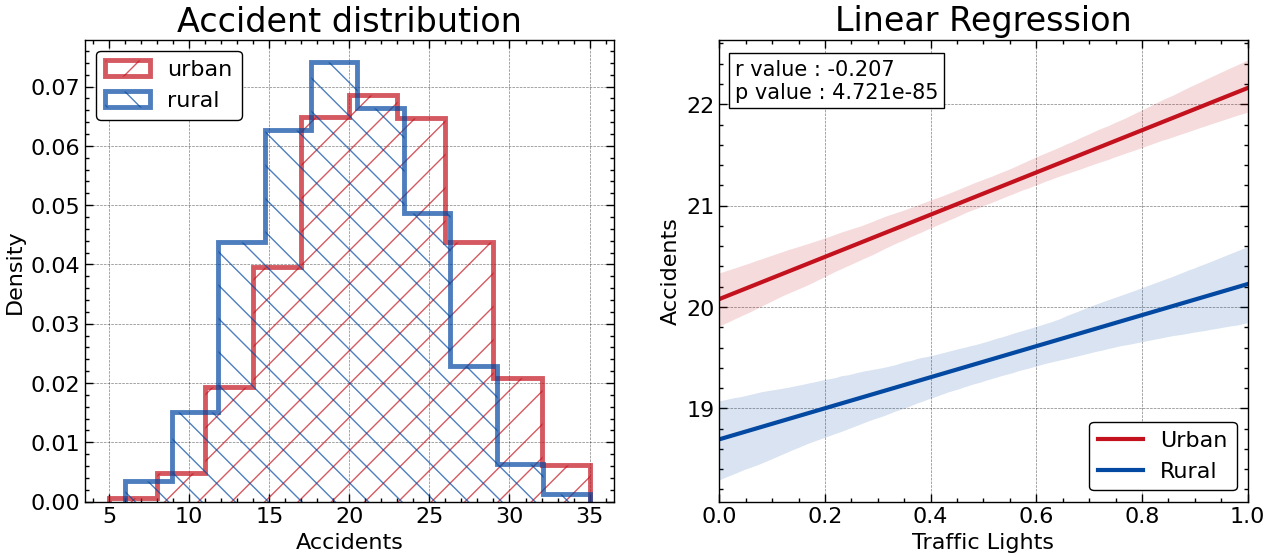

In [21]:
fig = plt.figure(figsize=(15, 6), dpi=100)
gs = gridspec.GridSpec(1, 2, figure=fig)
gs.update(wspace=0.2, hspace=0.5)

ax = fig.add_subplot(gs[0])
x = ta.loc[ta['urban_area'] == 1, 'accidents']
y = ta.loc[ta['urban_area'] == 0, 'accidents']

plt.hist(x, histtype='step', density=True, label='urban', color=seshadri[0], linewidth=3.5, hatch='/', alpha=0.7)
plt.hist(y, histtype='step', density=True, label='rural', color=seshadri[1], linewidth=3.5, hatch='\\', alpha=0.7)
plt.legend(loc='upper left', facecolor='white', edgecolor='black')
plt.title('Accident distribution', fontsize=24)
plt.xlabel('Accidents')
plt.ylabel('Density')

ax = fig.add_subplot(gs[1])
sns.regplot(y='accidents', x='traffic_lights', data=ta[ta['urban_area'] == 1], color=seshadri[0], scatter=False, label='Urban')
sns.regplot(y='accidents', x='traffic_lights', data=ta[ta['urban_area'] == 0], color=seshadri[1], scatter=False, label='Rural')
ax.legend(facecolor='white', edgecolor='black')

lr = linregress(x=ta['accidents'], y=ta['pavement_quality'])
ax.text(0.03, 0.873, f'r value : {lr.rvalue:.3f} \np value : {lr.pvalue:.3e}', transform=ax.transAxes, fontsize=15, bbox=dict(facecolor='white'))
ax.text(0.5, 1.02, 'Linear Regression', ha='center', fontsize=24, transform=ax.transAxes)
ax.set_xlim(0,1)
ax.set_xlabel('Traffic Lights')
ax.set_ylabel('Accidents')


plt.show()

## The relationship between Accident occurance, Speed and Rain Intensity

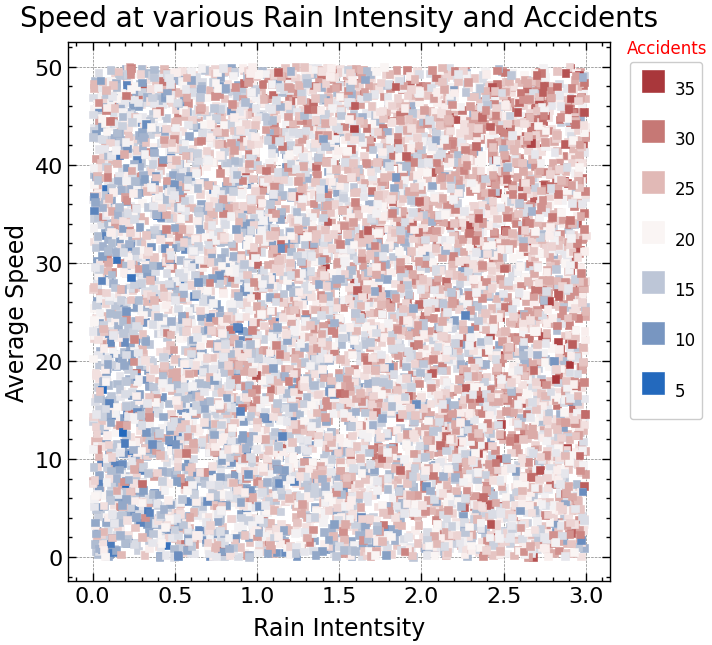

In [23]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)

x = 'rain_intensity'
y = 'average_speed'

cmap = sns.cubehelix_palette(rot=-.1, as_cmap=True)
sns.scatterplot(x=x, y=y, data=ta, hue='accidents', palette='vlag', alpha=1, s=30, marker='s', edgecolor=None)

ax.text(0.5, 1.03, 'Speed at various Rain Intensity and Accidents', ha='center', fontsize=20, transform=ax.transAxes)
ax.text(1.03, 0.98, 'Accidents', color='red', transform=ax.transAxes, fontsize=12)
ax.set_xlabel('Rain Intentsity', fontsize=17, labelpad=7)
ax.set_ylabel('Average Speed', fontsize=17)

handles, labels = ax.get_legend_handles_labels()
handles_r = reversed(handles)
labels_r = reversed(labels)
ax.legend(bbox_to_anchor=(1.02, 0.98), handles=list(handles_r),labels=list(labels_r), handleheight=3.5, handletextpad=0.3, markerscale=3, fontsize=12)

plt.show()

The plot suggests that accident frequency increases with rising rain intensity, whereas speed appears to have a negligible impact on the occurrence of accidents.

## Role of Pavement Quality in causing Accidents

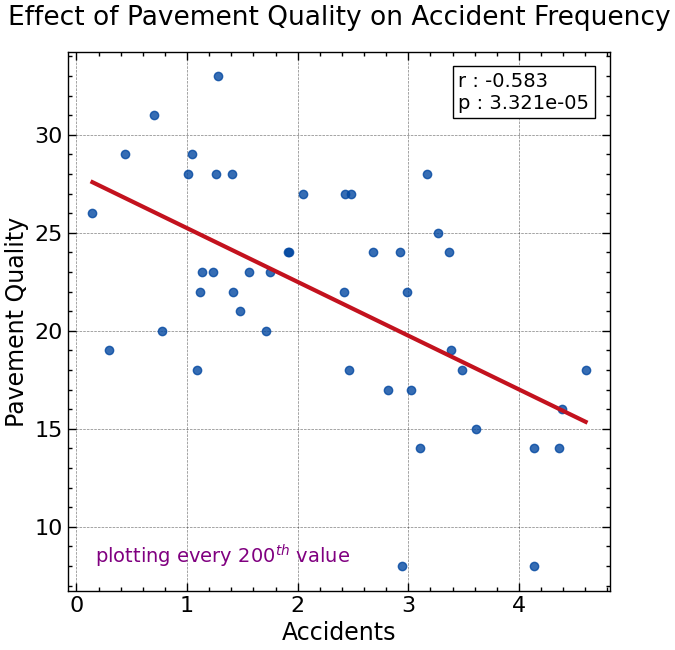

In [25]:
lr = linregress(y=ta['accidents'][::200], x=ta['pavement_quality'][::200])

# plotting every 200th value to de-clutter the plot, making the trend stand out

fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
sns.regplot(y='accidents', x='pavement_quality', data=ta[::200], ci=False,
            line_kws=dict(color=seshadri[0]), scatter_kws=dict(color=seshadri[1]))

ax.text(0.05, 0.05, 'plotting every 200$^{th}$ value', transform=ax.transAxes, fontsize=14, color='purple')
ax.text(0.72, 0.895, f'r : {lr.rvalue:.3f} \np : {lr.pvalue:.3e}', fontsize=14, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_xlabel('Accidents', fontsize=17)
ax.set_ylabel('Pavement Quality', fontsize=17)
ax.text(0.5, 1.05, 'Effect of Pavement Quality on Accident Frequency', fontsize=19, ha='center', transform=ax.transAxes)

plt.show()


The analysis suggests that pavement quality may have a negative impact on road safety; however, due to the high variability in the data, the strength of this relationship appears to be weak.

## Clustering

In [36]:
#removing all non-numerical and redundant information
ta1 = ta.copy().drop(columns=['period', 'time_of_day'])

ta1.dtypes

,0
accidents,int64
traffic_fine_amount,float64
traffic_density,float64
traffic_lights,float64
pavement_quality,float64
urban_area,int64
average_speed,float64
rain_intensity,float64
vehicle_count,float64
time_hrs,int64


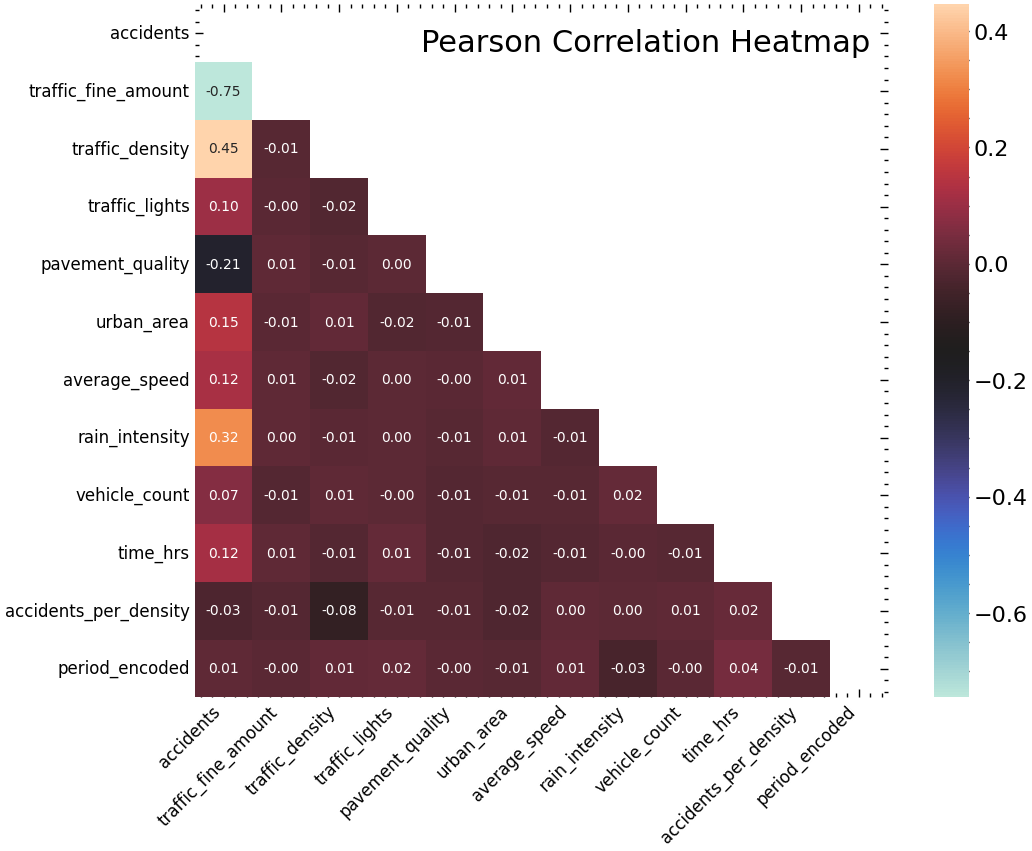

In [37]:
cm = ta1.corr(method='pearson')

mask = np.triu(np.ones_like(cm, dtype=bool))

plt.figure(figsize=(12, 9), dpi=100)
sns.heatmap(cm, annot=True, cmap='icefire', fmt=".2f",
            xticklabels=True, yticklabels=True, mask=mask, square=True)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.title('Pearson Correlation Heatmap', fontsize=22, y=0.92, x=0.65)
plt.grid(False)
plt.show()

The analysis indicates an inverse relationship between traffic fine amounts and the number of accidents. A closer examination is warranted to better understand the underlying patterns and potential contributing factors.

## Traffic Fine Amount and the Accident Frequency

<Figure size 700x700 with 0 Axes>

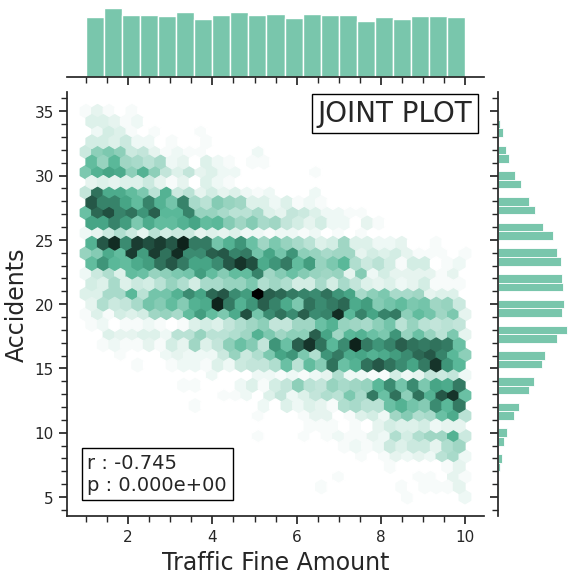

In [39]:
plt.figure(figsize=(7, 7), dpi=100)
sns.set_theme(style="ticks")
joint_plot = sns.jointplot(x='traffic_fine_amount', y='accidents', data=ta, kind="hex", color="#4CB391", ax=ax)
plt.xlabel('Traffic Fine Amount', fontsize=17)
plt.ylabel('Accidents', fontsize=17)

lr = linregress (x=ta['traffic_fine_amount'], y=ta['accidents'])

plt.text(6.5, 34.2, 'JOINT PLOT', fontsize=20, bbox=dict(facecolor='white', edgecolor='black'))
plt.text(1.03, 5.5, f'r : {lr.rvalue:.3f} \np : {lr.pvalue:.3e}', fontsize=14, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

Traffic Fine Amount serves as a strong predictor of accident frequency, exhibiting a well-defined relationship between the two variables. Although their individual distributions do not appear to be skewed, they demonstrate a close correlation, suggesting a consistent pattern.

## Machine Learning

In [40]:
# Machine Learning Models

ta_copy = ta.copy()

y = ta_copy['accidents']
X = ta_copy.drop(columns=['accidents', 'period', 'time_of_day'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, shuffle=True)


In [41]:
# Random Forest


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

clf = RandomForestRegressor(n_estimators=100, random_state=33)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("R2 :", r2_score(y_test, y_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 : 0.9607738621634457
Mean Absolute Error : 0.7457762557077625
Root Mean Squared Error : 1.0580102156587885


In [42]:
# optimize Random Forest


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pars = dict(n_estimators=[10, 50, 100, 200], max_depth=[None, 10, 20, 30],
            min_samples_split=[2, 5, 10],
            max_features=['auto', 'sqrt', 'log2'])

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=pars,
                                   n_iter=10,
                                   cv=5,
                                   n_jobs=1,
                                   random_state=17)

random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

print("R2 :", r2_score(y_test, y_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 : 0.950533815771871
Mean Absolute Error : 0.9349564661256352
Root Mean Squared Error : 1.1881090154290164


Considering all available parameters, the Random Forest algorithm demonstrates the capability to predict accident frequency; however, the model exhibits a modest error margin. Incorporating additional relevant parameters could potentially enhance the model's accuracy and predictive performance.

#END